In [41]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, roc_curve, precision_score, recall_score, f1_score, accuracy_score

In [42]:
df = pd.read_parquet('cic-collection.parquet')
df = df.drop(columns='Label')
df.shape

(9167581, 58)

In [43]:
df.head(20)

,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Mean,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,ClassLabel
0,4,2,0,12.0,0.0,6.0,6.000000,0.000000,0.0,0.000000,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,1,2,0,12.0,0.0,6.0,6.000000,0.000000,0.0,0.000000,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,3,2,0,12.0,0.0,6.0,6.000000,0.000000,0.0,0.000000,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,1,2,0,12.0,0.0,6.0,6.000000,0.000000,0.0,0.000000,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
4,609,7,4,484.0,414.0,233.0,69.142860,111.967896,207.0,103.500000,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
5,879,9,4,656.0,3064.0,313.0,72.888885,136.153809,1532.0,766.000000,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
6,1160,9,6,3134.0,3048.0,1552.0,348.222229,682.482544,1518.0,508.000000,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
7,524,7,4,2812.0,2820.0,1397.0,401.714294,679.914856,1410.0,705.000000,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
8,6,1,1,6.0,6.0,6.0,6.000000,0.000000,6.0,6.000000,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
9,1119,9,6,3160.0,3060.0,1565.0,351.111115,688.214966,1524.0,510.000000,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


In [44]:
feature_info = pd.DataFrame({
    'Feature Name': df.columns,
    'Data Type': df.dtypes
})
feature_info['Type Category'] = feature_info['Data Type'].apply(lambda x: 'Text' if x == 'object' else 'Number')
print(feature_info)
feature_info.to_csv('feature_info.csv', index=False)


                                      Feature Name Data Type Type Category
Flow Duration                        Flow Duration     int64        Number
Total Fwd Packets                Total Fwd Packets     int32        Number
Total Backward Packets      Total Backward Packets     int32        Number
Fwd Packets Length Total  Fwd Packets Length Total   float64        Number
Bwd Packets Length Total  Bwd Packets Length Total   float64        Number
Fwd Packet Length Max        Fwd Packet Length Max   float64        Number
Fwd Packet Length Mean      Fwd Packet Length Mean   float32        Number
Fwd Packet Length Std        Fwd Packet Length Std   float32        Number
Bwd Packet Length Max        Bwd Packet Length Max   float64        Number
Bwd Packet Length Mean      Bwd Packet Length Mean   float32        Number
Bwd Packet Length Std        Bwd Packet Length Std   float32        Number
Flow Bytes/s                          Flow Bytes/s   float64        Number
Flow Packets/s           

In [45]:
df.ClassLabel.value_counts()

ClassLabel
Benign          7186189
DDoS            1234729
DoS              397344
Botnet           145968
Bruteforce       103244
Infiltration      94857
Webattack          2995
Portscan           2255
Name: count, dtype: int64

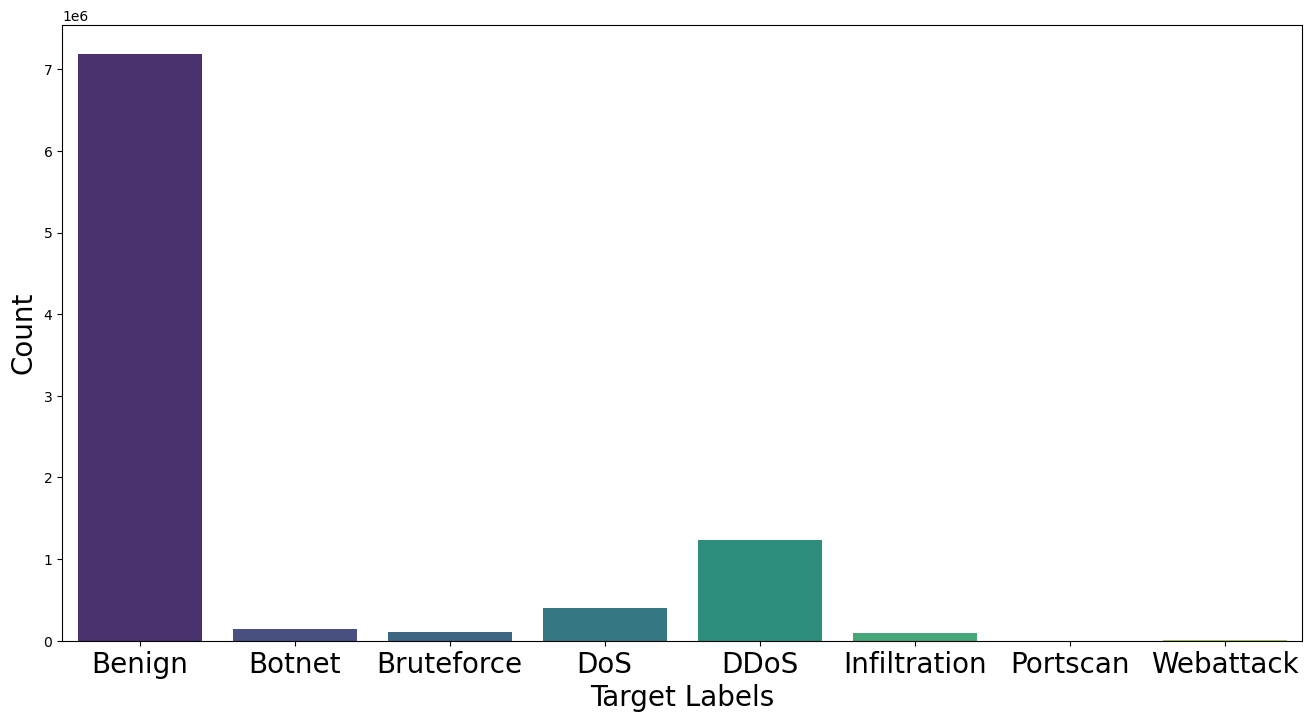

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))
sns.countplot(x='ClassLabel', data=df, palette='viridis')
plt.xlabel('Target Labels', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.xticks(fontsize=20)
plt.savefig('Distribution_target_variables.jpg')
plt.show()

In [8]:
df.ClassLabel.value_counts()

ClassLabel
Benign          7186189
DDoS            1234729
DoS              397344
Botnet           145968
Bruteforce       103244
Infiltration      94857
Webattack          2995
Portscan           2255
Name: count, dtype: int64

In [9]:
labels_and_counts = {
    'Benign': 7186189,
    'DDoS': 1234729,
    'DoS': 397344,
    'Botnet': 145968,
    'Bruteforce': 103244,
    'Infiltration': 94857,
    'Webattack': 2995,
    'Portscan': 2255
}

# Check if rows with each label are unique
for label, count in labels_and_counts.items():
    rows_with_label = df[df['ClassLabel'] == label]

    if not rows_with_label.duplicated().any():
        print(f"All {count} rows with label '{label}' are unique.")
    else:
        print(f"There are duplicates in {count} rows with label '{label}'.")
        print(rows_with_label[rows_with_label.duplicated()])
    print("="*50)

There are duplicates in 7186189 rows with label 'Benign'.
         Flow Duration  Total Fwd Packets  Total Backward Packets  \
321783               1                  2                       0   
346078               2                  3                       0   
361731               2                  1                       1   
366568               4                  2                       0   
369416               3                  3                       0   
...                ...                ...                     ...   
9030704              1                  3                       0   
9036659            158                  1                       1   
9111903            644                  1                       1   
9134426            428                  1                       1   
9163553             11                  2                       1   

         Fwd Packets Length Total  Bwd Packets Length Total  \
321783                       12.0                 

In [10]:
df.drop_duplicates(subset=df.columns[:-1], keep='first')
df.shape

(9167581, 58)

In [11]:

labels_to_keep = ['Benign', 'DDoS', 'Bruteforce', 'Botnet']
df = df[df['ClassLabel'].isin(labels_to_keep)]

In [12]:
df.head()

,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Mean,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,ClassLabel
0,4,2,0,12.0,0.0,6.0,6.00000,0.000000,0.0,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,1,2,0,12.0,0.0,6.0,6.00000,0.000000,0.0,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,3,2,0,12.0,0.0,6.0,6.00000,0.000000,0.0,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,1,2,0,12.0,0.0,6.0,6.00000,0.000000,0.0,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
4,609,7,4,484.0,414.0,233.0,69.14286,111.967896,207.0,103.5,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


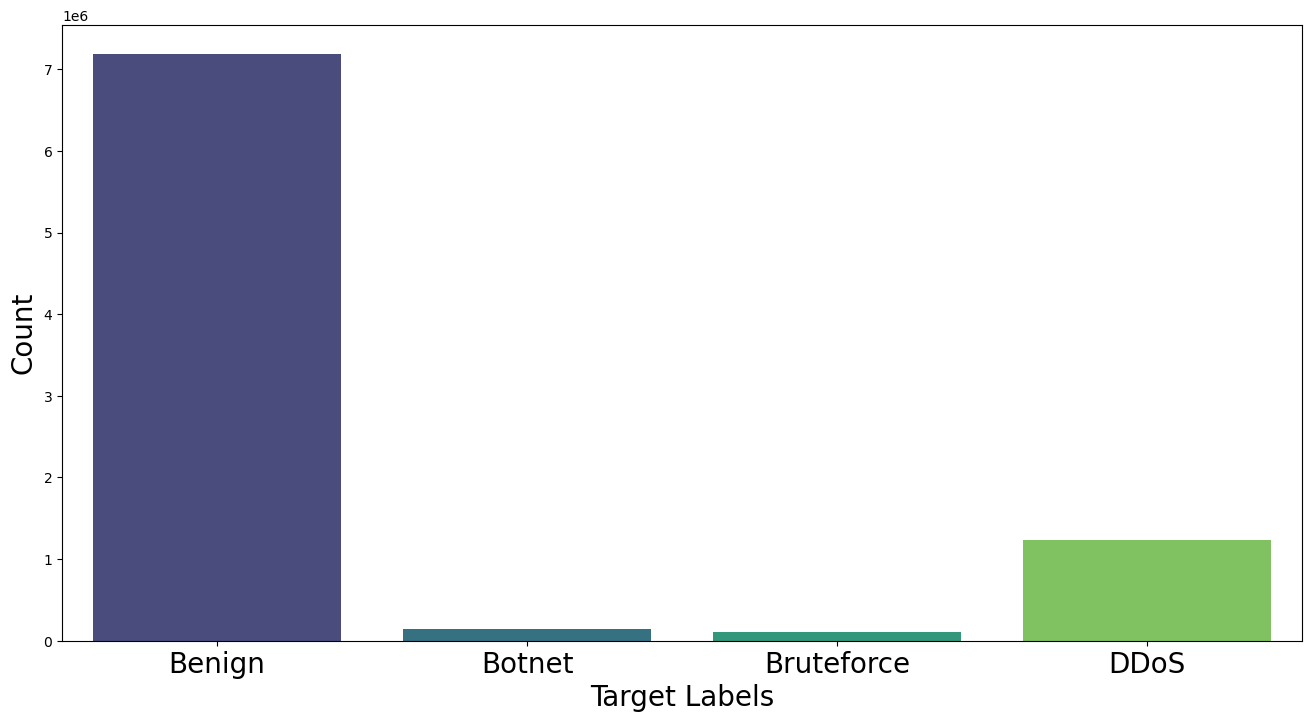

In [13]:
# Create a larger and clearer figure
plt.figure(figsize=(16, 8))

sns.countplot(x='ClassLabel', data=df, palette='viridis')

plt.xlabel('Target Labels', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.xticks(fontsize=20)  

plt.savefig('Target_distribution_after_drop.png')
# Show the plot
plt.show()

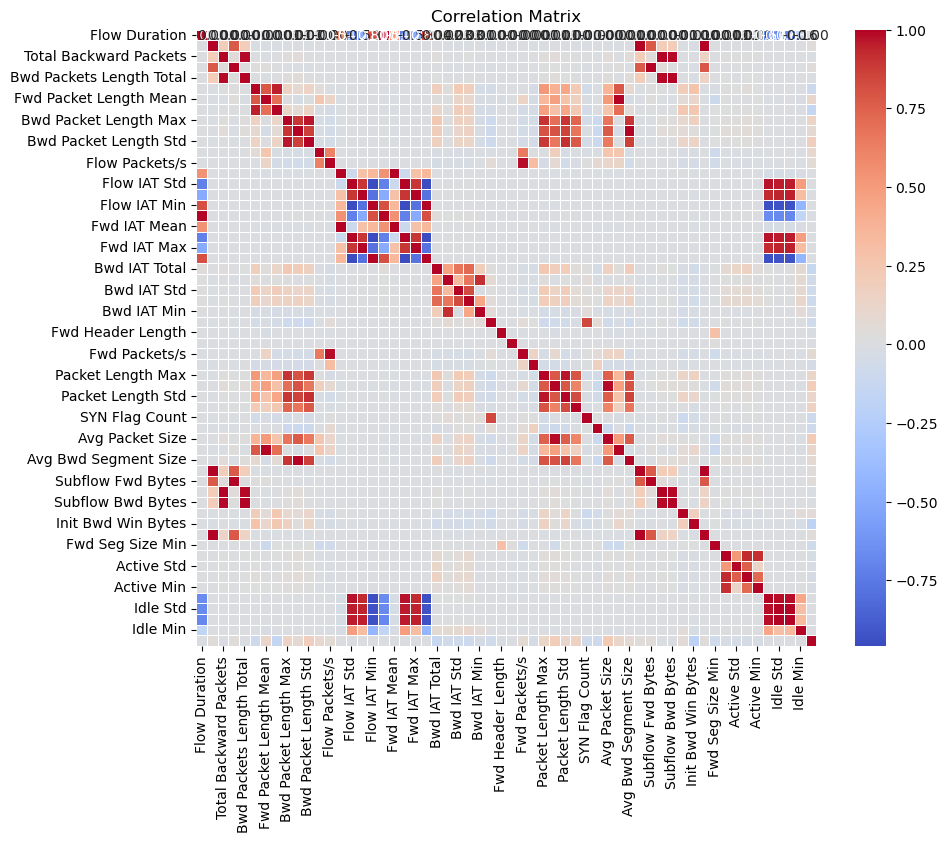

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
df['ClassLabel'] = df['ClassLabel'].astype('category').cat.codes

label_encoder = LabelEncoder()
df['ClassLabel'] = label_encoder.fit_transform(df['ClassLabel'])
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [15]:
correlation_matrix['ClassLabel'].drop('ClassLabel').sort_values(ascending=False)
# correlation_matrix

Avg Packet Size             0.218567
Packet Length Mean          0.203483
Bwd Packet Length Std       0.187353
Packet Length Variance      0.161060
Bwd Packet Length Max       0.137389
Packet Length Max           0.127886
Packet Length Std           0.116585
Fwd Packet Length Mean      0.107109
Avg Fwd Segment Size        0.107109
Flow Bytes/s                0.100945
Avg Bwd Segment Size        0.079361
Bwd Packet Length Mean      0.079361
Fwd Packets/s               0.069805
Flow Packets/s              0.060499
Init Fwd Win Bytes          0.054144
Subflow Fwd Bytes           0.040179
Fwd Packets Length Total    0.040179
Fwd Act Data Packets        0.038779
Total Fwd Packets           0.038028
Subflow Fwd Packets         0.038028
Bwd Header Length           0.001916
Flow IAT Mean               0.000892
Flow IAT Min                0.000816
Fwd IAT Min                 0.000710
Fwd IAT Mean                0.000348
Idle Std                    0.000075
Idle Max                   -0.000351
I

In [16]:
positive_correlation_features = [
    'Avg Packet Size', 'Packet Length Mean', 'Bwd Packet Length Std', 'Packet Length Variance',
    'Bwd Packet Length Max', 'Packet Length Max', 'Packet Length Std', 'Fwd Packet Length Mean',
    'Avg Fwd Segment Size', 'Flow Bytes/s', 'Avg Bwd Segment Size', 'Bwd Packet Length Mean',
    'Fwd Packets/s', 'Flow Packets/s', 'Init Fwd Win Bytes', 'Subflow Fwd Bytes',
    'Fwd Packets Length Total', 'Fwd Act Data Packets', 'Total Fwd Packets', 'Subflow Fwd Packets'
   
]
df = df[positive_correlation_features + ['ClassLabel']]
df.shape

(8670130, 21)

In [17]:
df.head()

,Avg Packet Size,Packet Length Mean,Bwd Packet Length Std,Packet Length Variance,Bwd Packet Length Max,Packet Length Max,Packet Length Std,Fwd Packet Length Mean,Avg Fwd Segment Size,Flow Bytes/s,...,Bwd Packet Length Mean,Fwd Packets/s,Flow Packets/s,Init Fwd Win Bytes,Subflow Fwd Bytes,Fwd Packets Length Total,Fwd Act Data Packets,Total Fwd Packets,Subflow Fwd Packets,ClassLabel
0,9.00000,6.000000,0.000000,0.000000,0.0,6.0,0.000000,6.00000,6.00000,3.000000e+06,...,0.0,5.000000e+05,5.000000e+05,329,12,12.0,1,2,2,0
1,9.00000,6.000000,0.000000,0.000000,0.0,6.0,0.000000,6.00000,6.00000,1.200000e+07,...,0.0,2.000000e+06,2.000000e+06,329,12,12.0,1,2,2,0
2,9.00000,6.000000,0.000000,0.000000,0.0,6.0,0.000000,6.00000,6.00000,4.000000e+06,...,0.0,6.666667e+05,6.666667e+05,245,12,12.0,1,2,2,0
3,9.00000,6.000000,0.000000,0.000000,0.0,6.0,0.000000,6.00000,6.00000,1.200000e+07,...,0.0,2.000000e+06,2.000000e+06,245,12,12.0,1,2,2,0
4,81.63636,74.833336,119.511505,11562.151367,207.0,233.0,107.527443,69.14286,69.14286,1.474548e+06,...,103.5,1.149425e+04,1.806240e+04,8192,484,484.0,5,7,7,0


In [18]:
df.ClassLabel.value_counts()

ClassLabel
0    7186189
3    1234729
1     145968
2     103244
Name: count, dtype: int64

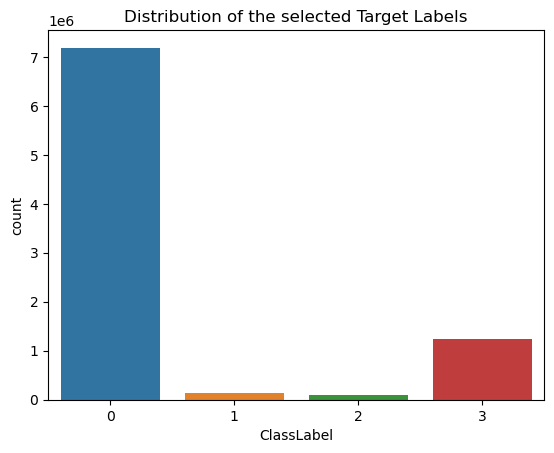

In [19]:
# Distribution of the target variable
sns.countplot(x='ClassLabel', data=df)
plt.title('Distribution of the selected Target Labels')
plt.show()

In [20]:
# Get the counts of each label
label_counts = df['ClassLabel'].value_counts()

# Set the target count to the count of label 2
target_count = label_counts.min()

# Undersample labels 0 and 1 to the target count
undersampled_df = pd.concat([
    df[df['ClassLabel'] == 0].sample(target_count, replace=False),
    df[df['ClassLabel'] == 1].sample(target_count, replace=False),
    df[df['ClassLabel'] == 2],
    df[df['ClassLabel'] == 3].sample(target_count, replace=False)
], axis=0)

# Shuffle the undersampled DataFrame to mix the labels
undersampled_df = undersampled_df.sample(frac=1).reset_index(drop=True)

In [21]:
undersampled_df.shape

(412976, 21)

In [22]:
label_counts = undersampled_df['ClassLabel'].value_counts()
label_counts

ClassLabel
2    103244
3    103244
0    103244
1    103244
Name: count, dtype: int64

In [23]:
df=undersampled_df


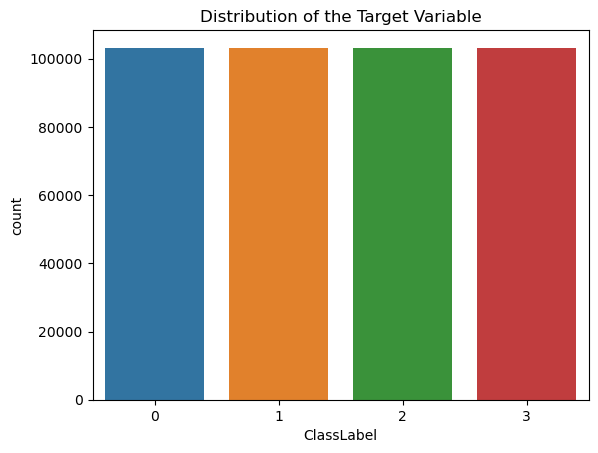

In [24]:
# Distribution of the target variable
sns.countplot(x='ClassLabel', data=df)
plt.title('Distribution of the Target Variable')
plt.show()

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

def apply_normalization(X, method='standard'):
    if method == 'standard':
        scaler = StandardScaler()
    elif method == 'minmax':
        scaler = MinMaxScaler()
    elif method == 'robust':
        scaler = RobustScaler()
    else:
        raise ValueError("Invalid normalization method. Choose 'standard', 'minmax', or 'robust'.")
    
    X_normalized = scaler.fit_transform(X)
    return X_normalized

In [26]:
X = df.drop('ClassLabel', axis=1)
y = df['ClassLabel']

# Split the data into training, testing, and validation sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.33, random_state=42)

In [50]:
# Choose the normalization method
normalization_method = 'standard'  # Change this to 'minmax' or 'robust' if needed

# Apply normalization
X_train_normalized = apply_normalization(X_train, method=normalization_method)
X_val_normalized = apply_normalization(X_val, method=normalization_method)
X_test_normalized = apply_normalization(X_test, method=normalization_method)

In [28]:
# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train_normalized, y_train)


RandomForestClassifier()

In [53]:
rf_y_pred = rf_model.predict(X_val_normalized)
rf_y_prob = rf_model.predict_proba(X_val_normalized)
rf_accuracy = accuracy_score(y_val, rf_y_pred)
rf_roc_auc = roc_auc_score(y_val, rf_y_prob, multi_class='ovr')

# Print only Accuracy and ROC AUC
print("Random Forest Model")
print(f"Normalization Method: {normalization_method}")
print(f"Accuracy: {rf_accuracy:.4f}")

print("="*50)


Random Forest Model
Normalization Method: standard
Accuracy: 0.8051


In [54]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Assuming y_val is a categorical variable with multiple classes
y_val_bin = label_binarize(y_val, classes=[0, 1, 2, 3])  # Binarize the labels

# Calculate ROC curve and ROC AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(y_val_bin.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_val_bin[:, i], rf_y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])



In [55]:
# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train_normalized, y_train)

C:\Users\shand\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [56]:
lr_y_pred = lr_model.predict(X_val_normalized)
lr_y_prob = lr_model.predict_proba(X_val_normalized)
lr_accuracy = accuracy_score(y_val, lr_y_pred)
lr_roc_auc = roc_auc_score(y_val, lr_y_prob,multi_class='ovr')
lr_classification_rep = classification_report(y_val, lr_y_pred)
print("Logistic Regression Model")
print(f"Normalization Method: {normalization_method}")
print(f"Accuracy: {lr_accuracy:.4f}")

print("="*50)

Logistic Regression Model
Normalization Method: standard
Accuracy: 0.9135


In [33]:
from sklearn.neighbors import KNeighborsClassifier

# K-Nearest Neighbors
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_normalized, y_train)

KNeighborsClassifier()

In [47]:
knn_y_pred = knn_model.predict(X_val_normalized)
knn_accuracy = accuracy_score(y_val, knn_y_pred)

print("K-Nearest Neighbors Model")
print(f"Normalization Method: {normalization_method}")
print(f"Accuracy: {knn_accuracy:.4f}")

print("="*50)

K-Nearest Neighbors Model
Normalization Method: standard
Accuracy: 0.9771


In [35]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train_normalized, y_train)

GaussianNB()

In [49]:
nb_y_pred = nb_model.predict(X_val_normalized)
nb_accuracy = accuracy_score(y_val, nb_y_pred)
nb_classification_rep = classification_report(y_val, nb_y_pred)

# Print Naive Bayes results
print("Gaussian Naive Bayes Model")
print(f"Normalization Method: {normalization_method}")
print(f"Accuracy: {nb_accuracy:.4f}")
# print("Classification Report:\n", nb_classification_rep)
print("="*50)

Gaussian Naive Bayes Model
Normalization Method: standard
Accuracy: 0.7272


In [51]:
# Make predictions on the test set
knn_y_test_pred = knn_model.predict(X_test_normalized)

# Calculate accuracy on the test set
knn_test_accuracy = accuracy_score(y_test, knn_y_test_pred)

# Print K-Nearest Neighbors results for the test set
print("K-Nearest Neighbors Model (Test Set)")
print(f"Normalization Method: {normalization_method}")
print(f"Test Accuracy: {knn_test_accuracy:.4f}")
print("="*50)


K-Nearest Neighbors Model (Test Set)
Normalization Method: standard
Test Accuracy: 0.9834


In [57]:
knn_y_test_pred

array([3, 0, 2, ..., 2, 3, 3], dtype=int64)